<a href="https://colab.research.google.com/github/FuRong1213-vibenshus/vibenshus/blob/master/CovidResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
updated = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("owid-covid-data.csv")

In [5]:
df.shape

(210442, 67)

In [6]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.019060e+05,2.015740e+05,2.003970e+05,1.830850e+05,183023.000000,181851.000000,200979.000000,200647.000000,199475.000000,182171.000000,...,130874.000000,129081.000000,84982.000000,153736.000000,196885.000000,168533.000000,7.133000e+03,7133.000000,7153.000000,7133.000000
mean,3.940645e+06,1.261928e+04,1.264143e+04,6.997581e+04,146.317927,147.054255,52027.412526,189.732140,189.612808,648.210024,...,10.658187,32.802148,50.866190,3.084543,73.640108,0.724960,4.540537e+04,9.686167,14.602563,1249.933634
std,2.472171e+07,8.719596e+04,8.520384e+04,3.621148e+05,754.960809,738.538085,94514.984380,935.017238,610.098943,935.847511,...,10.602533,13.534155,31.845193,2.550842,7.447919,0.149702,1.268598e+05,13.724070,27.001289,1662.209599
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,3.613000e+03,0.000000e+00,6.714000e+00,1.050000e+02,0.000000,0.143000,934.229500,0.000000,1.477000,27.010000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.670000e+01,0.230000,-0.280000,10.629403
50%,4.306700e+04,6.400000e+01,1.004290e+02,1.063000e+03,1.000000,1.714000,8550.315000,8.985000,20.123000,189.238000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.320800e+03,7.200000,7.220000,703.114715
75%,4.634210e+05,1.009000e+03,1.157857e+03,9.209000e+03,15.000000,17.000000,63246.894000,102.462000,137.133500,958.016000,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.247450e+04,15.330000,20.420000,1964.233723
max,5.961693e+08,4.079205e+06,3.436703e+06,6.453733e+06,18191.000000,14817.143000,655309.333000,195005.313000,35258.843000,6386.296000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.180000,9750.477354


In [8]:
df.drop(['new_deaths_smoothed', 'new_cases_per_million', 'total_cases_per_million'], axis=1, inplace=True)

In [9]:
df.shape

(210442, 64)

In [11]:
continent_unique = list(df.continent.unique())

In [12]:
continent_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [13]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [17]:
df2.rename(columns={"date":"Date", "continent":"Continent", "location":"Country","iso_code":"ISO_code"}, inplace=True)

In [19]:
df3=df2.groupby(["Date","Country",])
df3

In [29]:
df3 = df2.groupby(['Date','Country',])[['Date','Country','total_cases','total_deaths','total_vaccinations']].sum().reset_index(drop=True)

In [30]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value
...,...,...,...,...,...
210437,2022-08-21,Wallis and Futuna,761.0,7.0,missing_value
210438,2022-08-21,World,596169311.0,6453733.0,12500251659.0
210439,2022-08-21,Yemen,11915.0,2154.0,missing_value
210440,2022-08-21,Zambia,332264.0,4016.0,missing_value


In [33]:
df3['total_cases'].replace({'missing_value':0}, inplace=True)
df3['total_deaths'].replace({'missing_value':0}, inplace=True)
df3['total_vaccinations'].replace({'missing_value':0}, inplace=True)

In [34]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Argentina,0.0,0.0,0.000000e+00
...,...,...,...,...,...
210437,2022-08-21,Wallis and Futuna,761.0,7.0,0.000000e+00
210438,2022-08-21,World,596169311.0,6453733.0,1.250025e+10
210439,2022-08-21,Yemen,11915.0,2154.0,0.000000e+00
210440,2022-08-21,Zambia,332264.0,4016.0,0.000000e+00


In [43]:
df4=df3[df3['total_deaths']>1000000]
df4[df4.Country=='World']

,Date,Country,total_cases,total_deaths,total_vaccinations
45038,2020-09-19,World,30865298.0,1004910.0,0.000000e+00
45262,2020-09-20,World,31120436.0,1008875.0,0.000000e+00
45486,2020-09-21,World,31380128.0,1013282.0,0.000000e+00
45710,2020-09-22,World,31664411.0,1019433.0,0.000000e+00
45934,2020-09-23,World,31975961.0,1025959.0,0.000000e+00
...,...,...,...,...,...
209522,2022-08-17,World,593277001.0,6445517.0,1.248255e+10
209751,2022-08-18,World,594185076.0,6448408.0,1.248880e+10
209980,2022-08-19,World,594995023.0,6451050.0,1.249420e+10
210209,2022-08-20,World,595566212.0,6452115.0,1.249685e+10


In [38]:
df4['Country'].unique()

array(['World', 'High income', 'Upper middle income', 'Europe',
       'South America', 'Asia', 'Lower middle income', 'North America',
       'European Union', 'United States'], dtype=object)

In [39]:
country_deaths_greaterthan1000000 = list(df4.Country.unique())

In [40]:
country_deaths_greaterthan1000000

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

In [41]:
df3[df3.Country=="World"]

,Date,Country,total_cases,total_deaths,total_vaccinations
86,2020-01-22,World,557.0,17.0,0.000000e+00
107,2020-01-23,World,657.0,18.0,0.000000e+00
130,2020-01-24,World,944.0,26.0,0.000000e+00
155,2020-01-25,World,1437.0,42.0,0.000000e+00
181,2020-01-26,World,2120.0,56.0,0.000000e+00
...,...,...,...,...,...
209522,2022-08-17,World,593277001.0,6445517.0,1.248255e+10
209751,2022-08-18,World,594185076.0,6448408.0,1.248880e+10
209980,2022-08-19,World,594995023.0,6451050.0,1.249420e+10
210209,2022-08-20,World,595566212.0,6452115.0,1.249685e+10


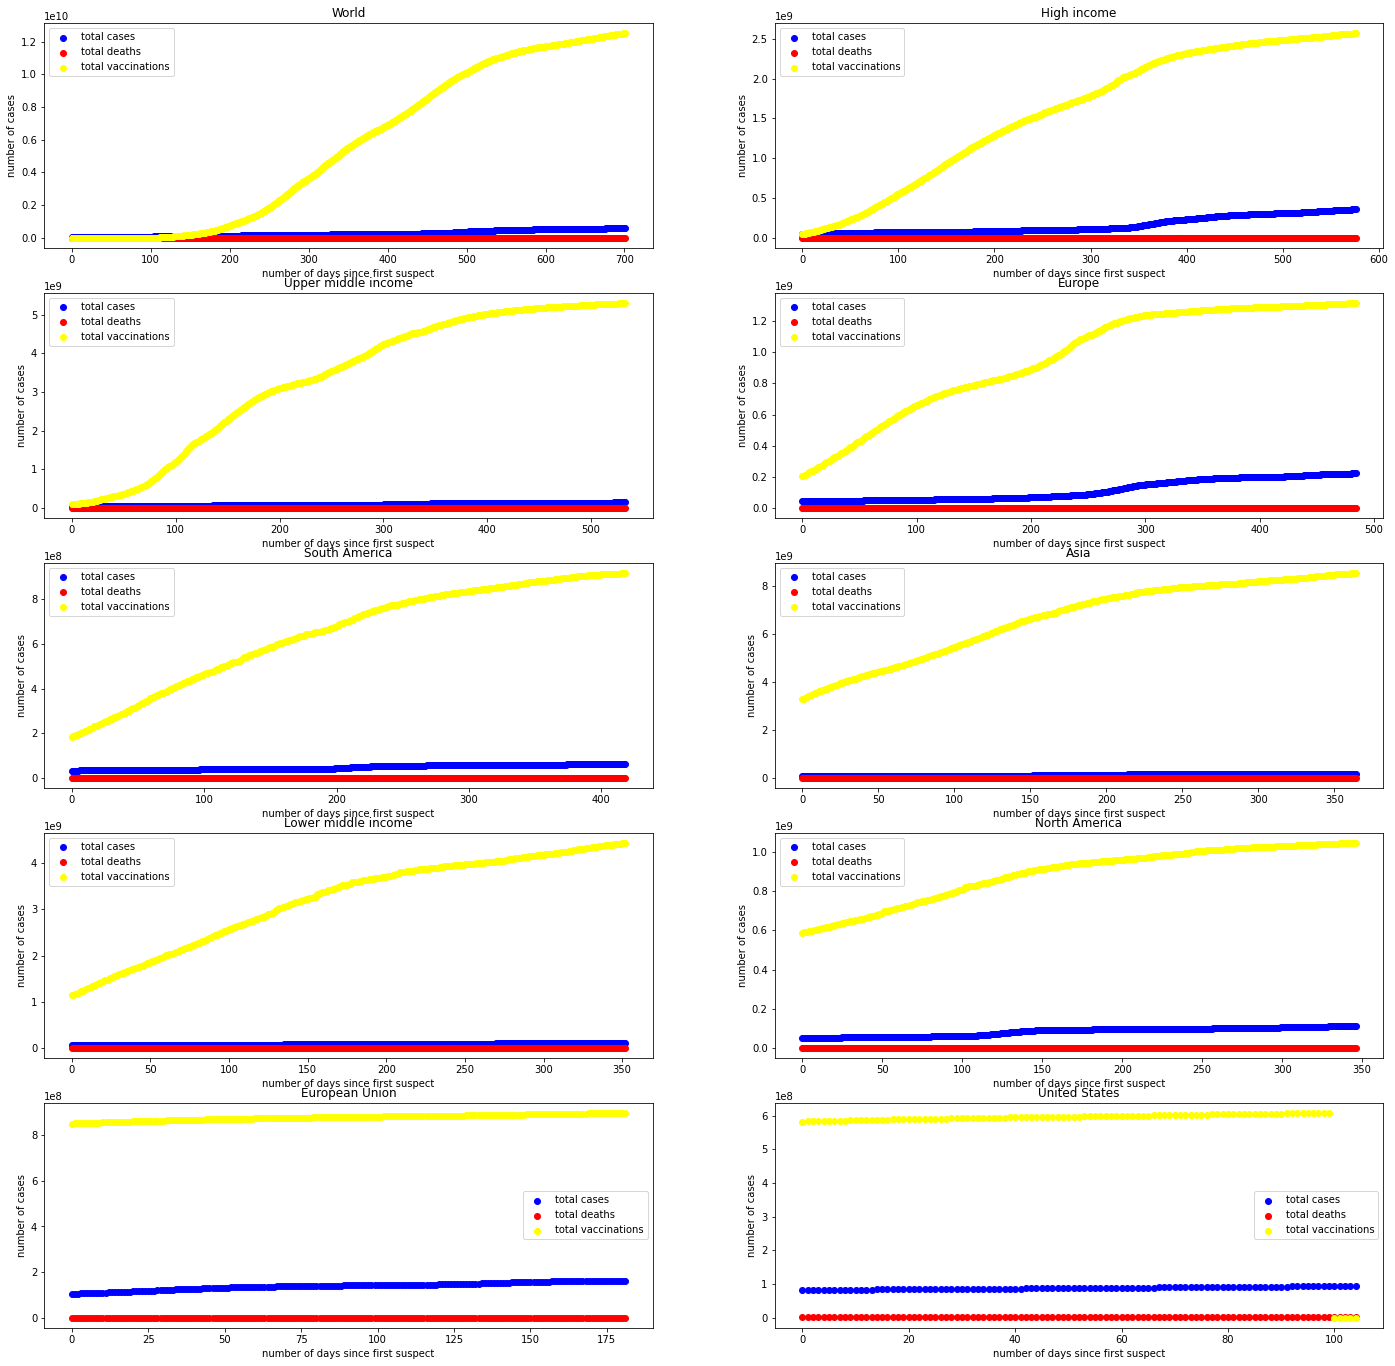

In [60]:
countries = df4.Country.unique()
number_of_countries = len(countries)
fig, axes = plt.subplots(5,2, figsize=(24, 24))

for idx, ax in enumerate(axes.flat):
  C = df4[df4['Country']==countries[idx]].reset_index()
  ax.scatter(np.arange(0, len(C)), C['total_cases'], color='blue', label='total cases')
  ax.scatter(np.arange(0, len(C)), C['total_deaths'], color='red', label='total deaths')
  ax.scatter(np.arange(0, len(C)), C['total_vaccinations'], color='yellow', label='total vaccinations')
  ax.set_title(countries[idx])
  ax.set_xlabel("number of days since first suspect")
  ax.set_ylabel("number of cases")
  ax.legend()